In [280]:
# import dependencies
# data cleaning and manipulation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [281]:
df = pd.read_csv("data.csv") #please change path according to where did you save data.csv file

In [282]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [283]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [284]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [285]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [286]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [287]:
# Explore and visualize the data
df = df.drop(columns = 'Unnamed: 32')#Menghapus Column Unnamed (missing value)
df = df.drop(columns = 'id')

In [288]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [289]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [290]:
# mapping dictionary to convert 'M' to 1 and 'B' to 0
mapping = {'M': 1, 'B': 0}

# replace method to perform the conversion
df['diagnosis'] = df['diagnosis'].replace(mapping)


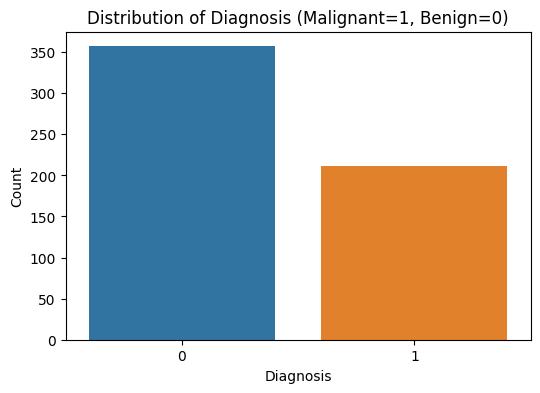

In [291]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Explore the target variable (diagnosis)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='diagnosis')
plt.title('Distribution of Diagnosis (Malignant=1, Benign=0)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

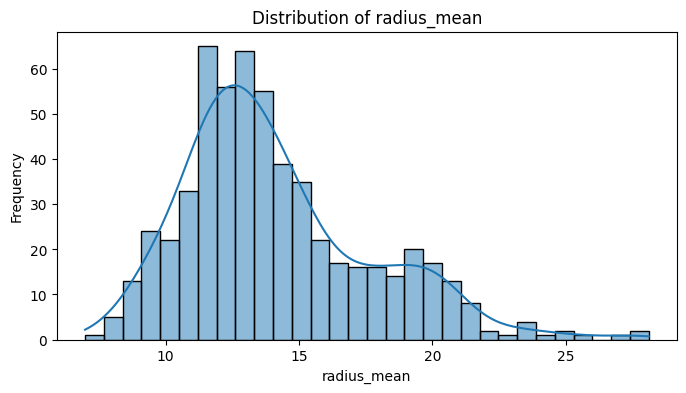

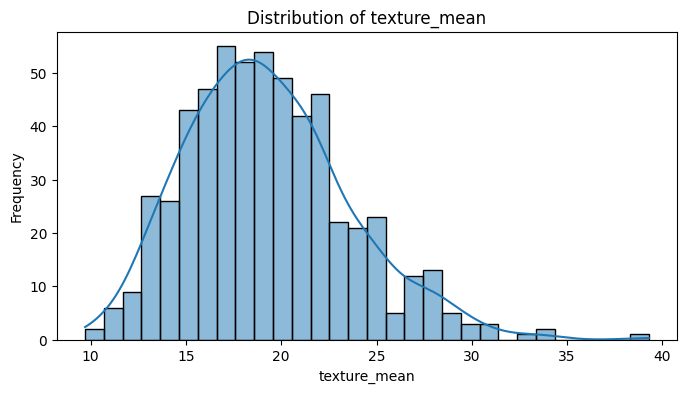

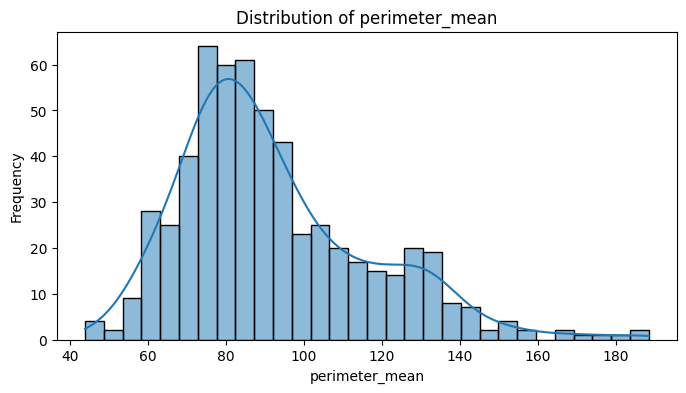

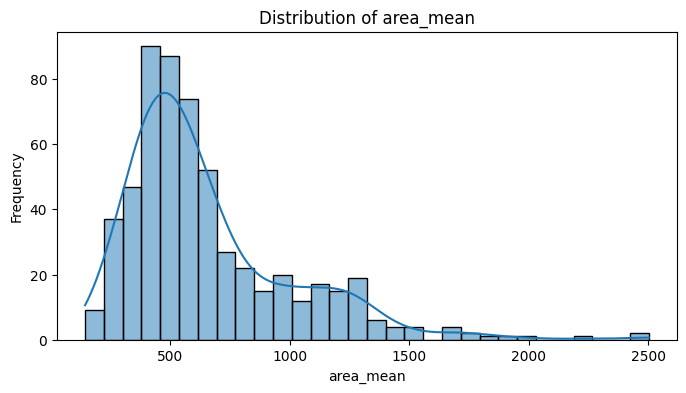

In [292]:
# Explore the distribution of some numerical features
features_to_explore = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
for feature in features_to_explore:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=feature, kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


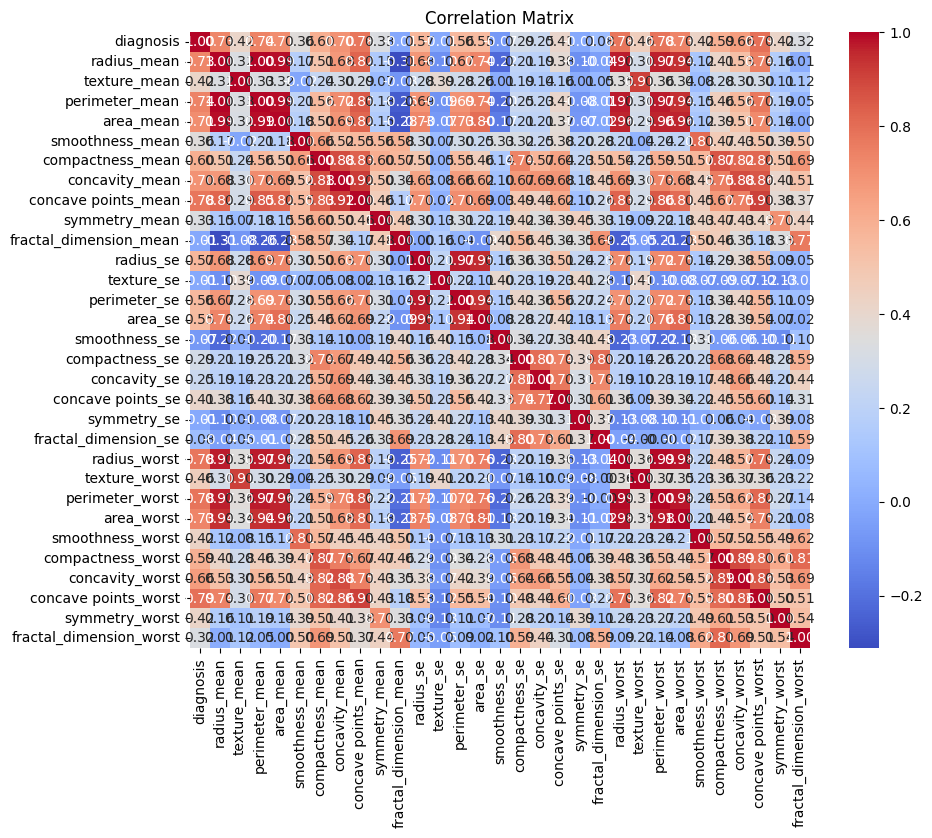

In [293]:
#Exploring the correlation between the attributes
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

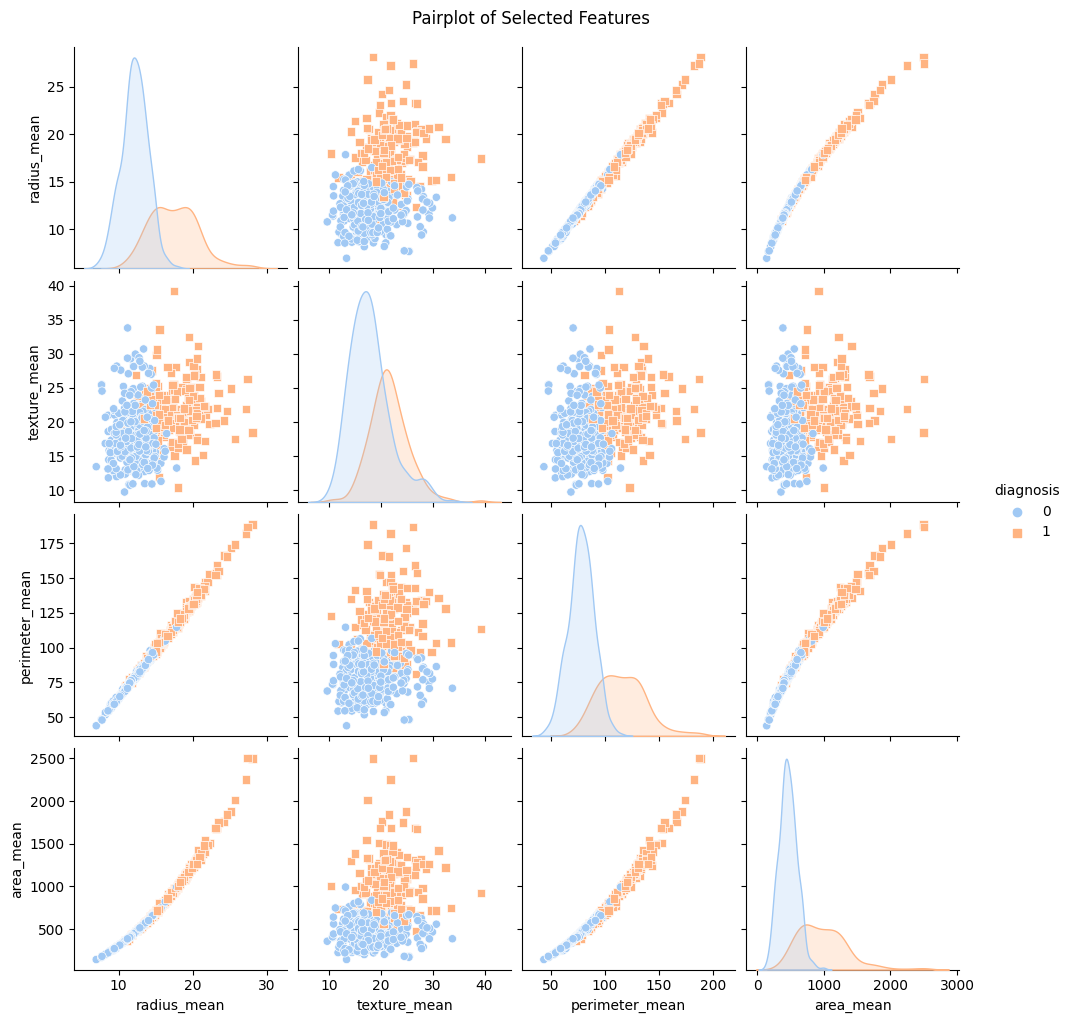

In [294]:
# Pairplot for selected features
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'diagnosis']
sns.pairplot(data=df[selected_features], hue='diagnosis', markers=['o', 's'], palette='pastel')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()


In [295]:
y=df['diagnosis']
X=df.drop('diagnosis', axis=1)

In [296]:
# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [297]:
print(X_train.shape,X_test.shape)

(398, 30) (171, 30)


In [298]:
lr= LogisticRegression(max_iter=10000)


In [299]:
# Fit the model with the training data
lr.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [300]:
y_pred = lr.predict(X_test)


In [301]:
# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [302]:
# Print the metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)

Accuracy:  0.9766081871345029
Precision:  0.9682539682539683
Recall:  0.9682539682539683
F1-Score:  0.9682539682539683


In [303]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [304]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,recall_score,precision_score,f1_score

confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print('Confusion matrix of given model ',confusion)
print('classification of model ',classification_rep)


Confusion matrix of given model  [[106   2]
 [  2  61]]
classification of model                precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



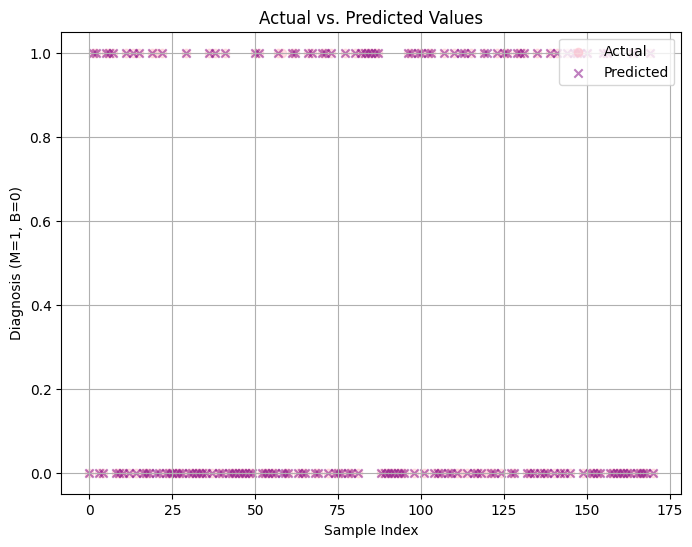

In [305]:
plt.figure(figsize=(8, 6))
plt.scatter(np.arange(len(y_test)), y_test, color='pink', label='Actual', marker='o', alpha=0.5,linestyle='-')
plt.scatter(np.arange(len(y_pred)), y_pred, color='purple', label='Predicted', marker='x', alpha=0.5,linestyle='-')
# Customize the plot
plt.title("Actual vs. Predicted Values")
plt.xlabel("Sample Index")
plt.ylabel("Diagnosis (M=1, B=0)")
plt.legend(loc='upper right')
plt.grid(True)

# Show the plot
plt.show()

In [306]:
def sigmoid(x):
    x = np.clip(x, -500, 1000)  # limit the values to avoid overflow or underflow
    return 1 / (1 + np.exp(-x))


In [307]:
# Cost function for logistic regression
def cost_function(X, y, weights):
    z = np.dot(X, weights)
    predict_1 = y * np.log(sigmoid(z))
    predict_0 = (1 - y) * np.log(1 - sigmoid(z))
    return -sum(predict_1 + predict_0) / len(X)


In [308]:
# Gradient descent
def gradient_descent(X, y, weights, lr, iterations):
    for i in range(iterations):
        z = np.dot(X, weights)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size
        weights -= lr * gradient
    return weights

In [309]:
weights = np.zeros(X_train.shape[1])


In [310]:
# Train the model
lr1=0.01
iter1=5000

In [311]:
# Calculate accuracy, precision, recall, and F1-score
weights1= gradient_descent(X_train, y_train, weights, lr=0.01, iterations=5000)
# Predict on the test set
y_pred_custom1 = sigmoid(np.dot(X_test, weights1))
y_pred_custom1 = [1 if i > 0.5 else 0 for i in y_pred_custom1]
accuracy_custom1= accuracy_score(y_test, y_pred_custom1)
precision_custom1 = precision_score(y_test, y_pred_custom1)
recall_custom1 = recall_score(y_test, y_pred_custom1)
f1_custom1 = f1_score(y_test, y_pred_custom1)
# Print the metrics
print("learning rate:", lr1)
print("number of iterations:", iter1)
print("Custom Accuracy: ", accuracy_custom1)
print("Custom Precision: ", precision_custom1)
print("Custom Recall: ", recall_custom1)
print("Custom F1-Score: ", f1_custom1)

learning rate: 0.01
number of iterations: 5000
Custom Accuracy:  0.9883040935672515
Custom Precision:  0.9841269841269841
Custom Recall:  0.9841269841269841
Custom F1-Score:  0.9841269841269841


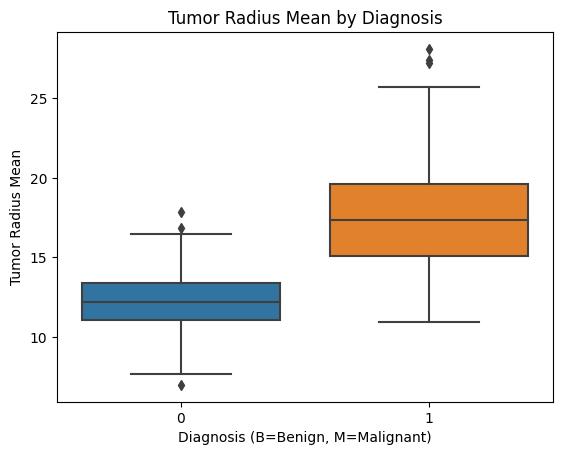

In [312]:
# Create a boxplot
sns.boxplot(x='diagnosis', y='radius_mean', data=df)
plt.title('Tumor Radius Mean by Diagnosis')
plt.xlabel('Diagnosis (B=Benign, M=Malignant)')
plt.ylabel('Tumor Radius Mean')
plt.show()